In [1]:
# Below line is necessary to display plots in notebook
%matplotlib inline

# Linear Algebra libs
import numpy as np # LA lib
import pandas as pd # Data analysis lib

# ML libs
# import theano.tensor as tt 
# import tensorflow as tf

# Plotting libs
import matplotlib.pyplot as plt # plotting lib
import seaborn as sns # matplotlib wrapper plotting lib

# Stat libs
import random # https://docs.python.org/3.6/library/random.html

# --- Pandas settings --- #
# Removes rows and columns truncation of '...'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [3]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
print(df['diagnosis'].value_counts())
df['diagnosis_binary'] = df['diagnosis'].map({'B':0, 'M':1})
df['diagnosis_binary'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64


0    357
1    212
Name: diagnosis_binary, dtype: int64

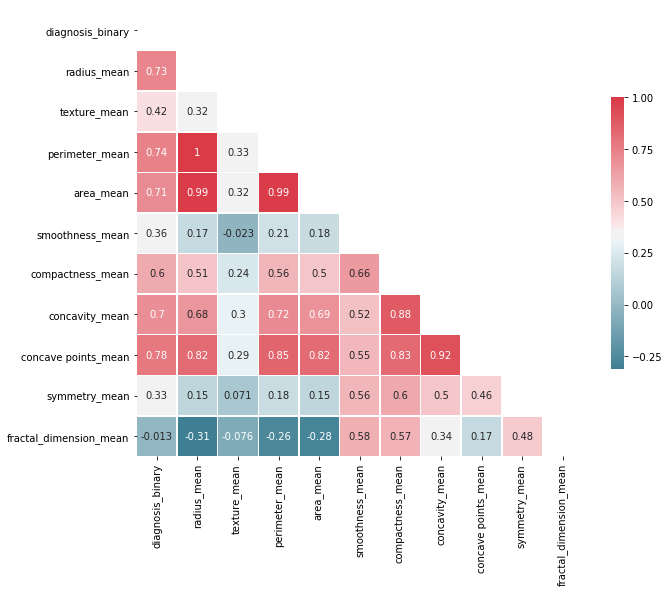

In [8]:
def correlation_heatmap(data=None, vmax=1, annot=True, corr_type='pearson'):
    if data is None:
        raise ValueError(
            "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    # Taken from the seaborn example at:
    # http://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Compute the correlation matrix
    corr = data.corr(corr_type)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    fig, axes = plt.subplots(figsize=(10, 10))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax, annot=annot, square=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=axes)
    plt.show()
    plt.close()
    
imp_cols = ['diagnosis_binary', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
correlation_heatmap(df[imp_cols])

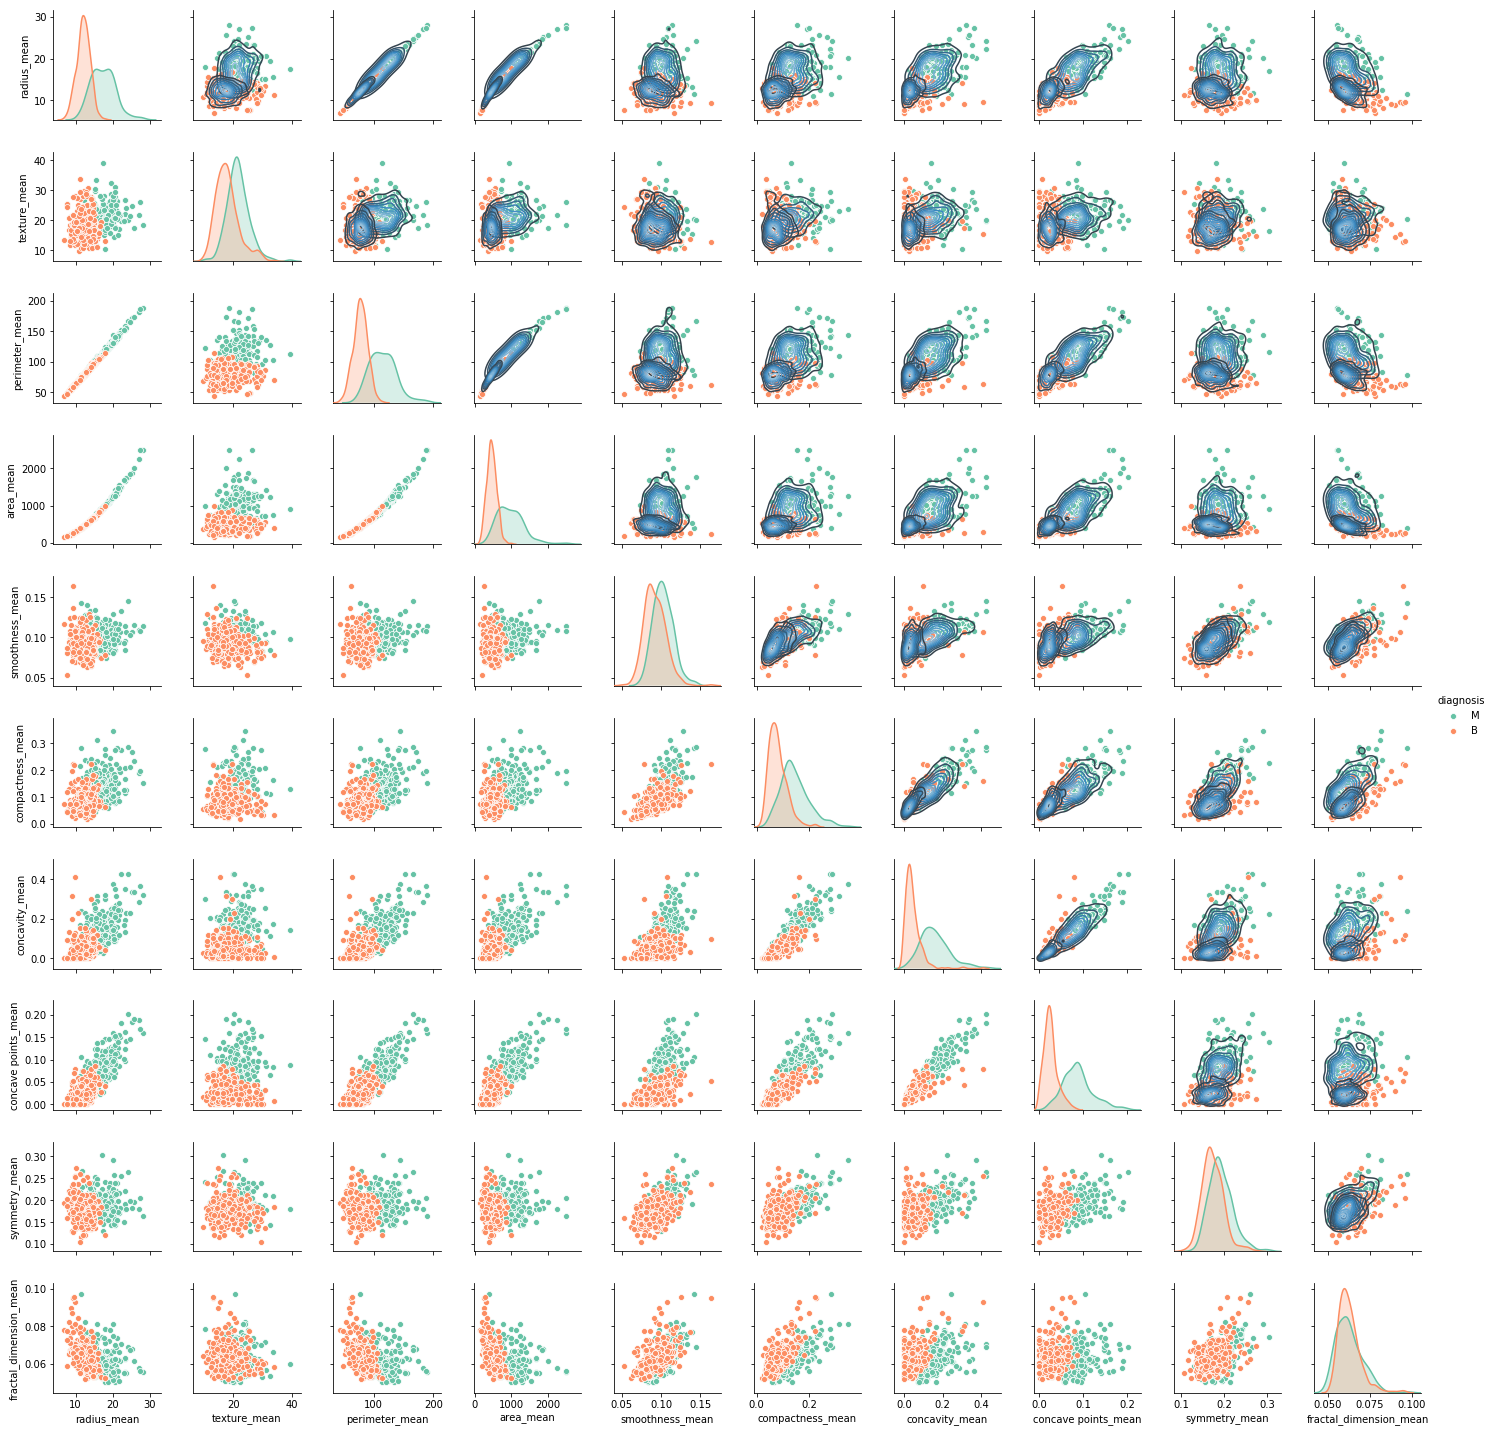

In [9]:
imp_cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(data=df[imp_cols], hue='diagnosis', palette='Set2', diag_kind='kde', size=2).map_upper(sns.kdeplot, cmap='Blues_d')

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 


## Manage your time and don't spend it all on data exploration or something like that. You got this!

## Start PCA

In [10]:
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
from sklearn.decomposition import PCA # You don't necessarily have to use this

# Separating out the target
y = df['diagnosis']

# Separating out the features
X = df.drop('diagnosis', axis=1)

# Standardizing the features
X = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=X.shape[1])
pcs_X_df = pca.fit_transform(X)

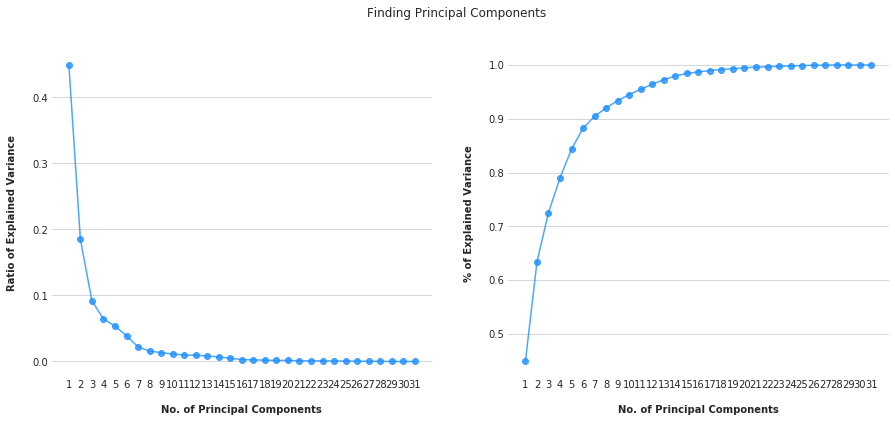

In [11]:
def scree_plot(explained_vars):
    
    plt.style.use('seaborn-whitegrid')
    n_pcs = np.arange(1, len(explained_vars)+1)
    fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(15, 6))
    ax1.plot(n_pcs, explained_vars, 'o-', color='dodgerblue', alpha=0.8)
    ax1.set_xlabel('No. of Principal Components', fontweight='bold', labelpad=15)
    ax1.set_ylabel('Ratio of Explained Variance', fontweight='bold', labelpad=15)
    ax1.set_xticks(n_pcs)
    ax1.set_xticklabels(labels=n_pcs)
    # Remove all of the axis tick marks
    ax1.tick_params(bottom=True, top=False, left=False, right=False)
    # Hide all of the spines
    for spine in ax1.spines.values():
        spine.set_visible(False)
    # Turn off y axis grid
    ax1.grid(axis='x')
    
    ax2.plot(n_pcs, pca.explained_variance_ratio_.cumsum(), 'o-', color='dodgerblue', alpha=0.8)
    ax2.set_xlabel('No. of Principal Components', fontweight='bold', labelpad=15)
    ax2.set_ylabel('% of Explained Variance', fontweight='bold', labelpad=15)
    ax2.set_xticks(n_pcs)
    ax2.set_xticklabels(labels=n_pcs)
    # Remove all of the axis tick marks
    ax2.tick_params(bottom=True, top=False, left=False, right=False)
    # Hide all of the spines
    for spine in ax2.spines.values():
        spine.set_visible(False)
    # Turn off y axis grid
    ax2.grid(axis='x')
    plt.suptitle("Finding Principal Components")
    plt.show()
    plt.close()
        
    
scree_plot(pca.explained_variance_ratio_)

Looking at the line plot, we can say around 10 Principal Components explains the variance.

In [12]:
['PC{}'.format(x) for x in range(1, 11)]

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [13]:
pcs_df = pd.DataFrame(data = pcs_X_df[:, :8], columns = ['PC{}'.format(x) for x in range(1, 8)])
pcs_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.225770,2.116196,-0.948109,-3.695778,-1.256280,1.419117,2.194974,-0.315737,-0.156946,-0.889455
1,2.655802,-3.784776,-0.502825,-1.123938,0.551107,0.019273,-0.099645,0.385282,-0.711683,1.049263
2,5.892492,-1.005579,-0.487149,-0.942486,-0.191711,0.541332,-0.660969,0.058983,0.024004,0.456603
3,7.135401,10.318716,-3.339501,-0.085947,-2.938456,3.062748,1.380734,1.150379,-1.405498,-1.123232
4,4.129423,-1.905579,1.454000,-2.880175,0.365289,-1.243428,-1.073155,0.717646,-0.263770,0.354929


## Start k-means

In [14]:
def k_means_results(data, k, seed):
    from sklearn.cluster import KMeans
    import sklearn.metrics.pairwise as pairwise
    
    # Initialize and predict k-means clusters
    results = {}
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kcl = kmeans.fit(data)
    
    # Add results from model
    results['data'] = data
    results['k'] = k
    results['labels'] = kcl.labels_
    results['SSE'] = kcl.inertia_
    
    return results

In [16]:
ks = [1,3,5,7,9,11,13,15,17,19,21,23]
sses = []
seed = 1234
for k in ks:
    result = k_means_results(pcs_df, k, seed)
    sses.append(result['SSE'])
    
results = pd.DataFrame.from_records(zip(ks, sses), columns=['K', 'SSE'])
print(results)

     K           SSE
0    1  16667.879326
1    3   9317.936614
2    5   7765.264131
3    7   6737.797228
4    9   6054.546872
5   11   5657.967747
6   13   5297.355216
7   15   5006.655374
8   17   4746.883047
9   19   4547.692571
10  21   4332.167994
11  23   4229.756414


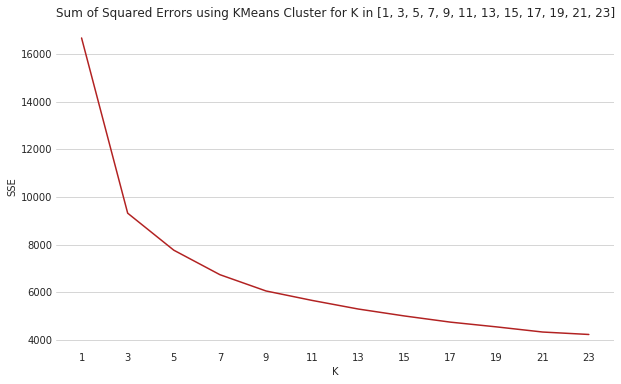

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(results.K, results.SSE, color='firebrick', label='SSE')
ax.set_title("Sum of Squared Errors using KMeans Cluster for K in {0}".format(ks))
ax.set_xticks(ks)
ax.set_xticklabels(ks)
ax.set_xlabel("K")
ax.set_ylabel("SSE")
ax.tick_params(bottom=True, top=False, left=False, right=False)
# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
# Turn off y axis grid
ax.grid(axis='x')
axes.legend()
plt.show()

In [31]:
final_df = pd.concat([pcs_df, y], axis=1)
final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.225770,2.116196,-0.948109,-3.695778,-1.256280,1.419117,2.194974,-0.315737,-0.156946,-0.889455,M
1,2.655802,-3.784776,-0.502825,-1.123938,0.551107,0.019273,-0.099645,0.385282,-0.711683,1.049263,M
2,5.892492,-1.005579,-0.487149,-0.942486,-0.191711,0.541332,-0.660969,0.058983,0.024004,0.456603,M
3,7.135401,10.318716,-3.339501,-0.085947,-2.938456,3.062748,1.380734,1.150379,-1.405498,-1.123232,M
4,4.129423,-1.905579,1.454000,-2.880175,0.365289,-1.243428,-1.073155,0.717646,-0.263770,0.354929,M


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


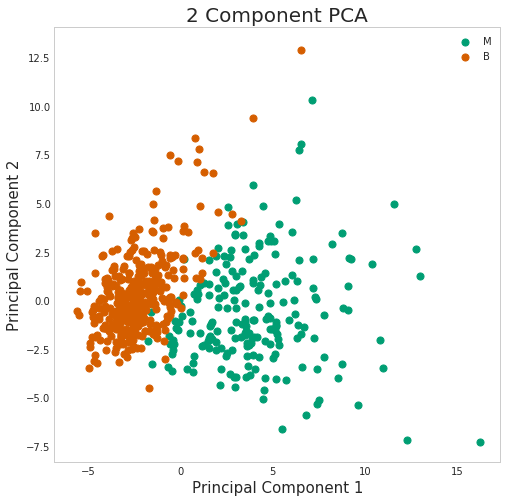

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = y.unique()
colors = [[0,158/255,115/255],
          [213/255,94/255,0]]

for target, color in zip(targets,colors):
    indicesToKeep = final_df['diagnosis'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.